## Define a stop loss 

- A stop-loss order specifies that a stock be bought or sold when it reaches a specified price known as the stop price.
- A disadvantage is that a short-term price fluctuation could activate the stop and trigger an unnecessary sale

## Type of stop loss 
- **Stop-Loss**: A stop-loss is designed to limit our loss on an open position. For example, setting a stop-loss order for 5% below the price at which we opened a long position will limit our loss to 5%.

- **Trailing Stop-Loss** : A trailing stop-loss is designed to protect the profit of an open position. For example, setting a trailing stop-loss order for 5% for a long position will have a starting maximum loss of 5%. If the price goes up, the stop level is updated to 5% below the **current price**; if the price goes down, the stop level will not be adjusted, we trigger a sell.

Since we are working with a trending strategy of 5 days windows we need to know what is the average volatility in a 5 days time windows.

In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

data = pd.read_csv("data/XRP_price_20210608.csv")
data['date'] = data['time'].apply(pd.Timestamp,unit='s')

NAME='RIPPLE'

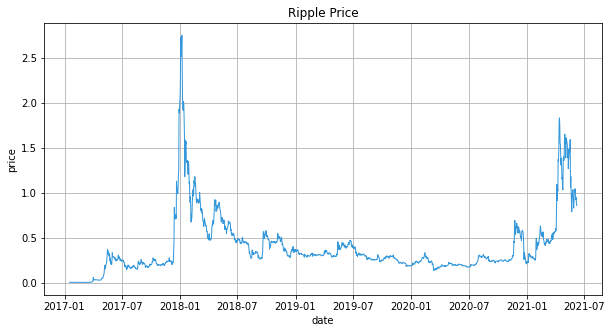

In [40]:
fig,ax = plt.subplots(figsize=(10,5))


x_lab =  data['date'].values
y_price = data['close'].values
ax.plot(x_lab,y_price,color='#3498db',lw=1.0)
ax.set_ylabel('price')
ax.set_xlabel('date')
ax.grid(True)
plt.title('Ripple Price')
plt.show()

In [164]:
# Split per year 
# average percentage change per year 
# per month 
datum = pd.read_csv("data/XRP_price_20210608.csv")
datum['date'] = datum['time'].apply(pd.Timestamp,unit='s')
datum['year'] = datum['date'].apply(lambda x: pd.Timestamp(x).year).apply(str)
datum['month'] = datum['date'].apply(lambda x: pd.Timestamp(x).strftime('%b'))




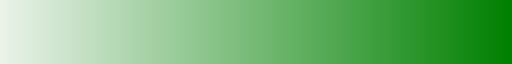

In [165]:
cm

In [177]:
#=====
K=6
data = datum[['close','year','month']].copy()
data['pct_change'] = data['close'].pct_change(periods=K)

data = data.groupby(by=['month','year']).median().reset_index()
# data = data.set_index('year')
# months = list(np.uniquedata['month'].values)


def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

cm = sns.light_palette("green", as_cmap=True)
# cm =sns.color_palette(palette="coolwarm", as_cmap=True)
df = data.pivot(index='year',columns=['month'],values='pct_change')
del data
s = (df.style.background_gradient(cmap=cm,low=-0.7,high=0.4).highlight_null(null_color='black'))
# df.style.applymap(color_negative_red)
s

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2017,0.022895,0.034483,0.335878,-0.020329,-0.045455,-0.077869,-0.036022,0.084381,0.643359,0.048178,-0.011209,-0.061303
2018,0.014767,-0.039301,-0.026580,-0.096702,-0.143577,-0.001319,-0.070943,-0.103997,-0.060033,-0.052604,-0.020841,0.004708
2019,0.002452,-0.039209,-0.022335,0.008336,-0.027812,-0.028882,0.000902,-0.000648,0.034780,-0.064839,0.045004,0.001340
2020,0.030516,-0.017300,-0.109937,0.027088,0.034965,0.049434,-0.028164,0.022727,-0.008044,0.077406,0.015715,0.001832
2021,0.134817,nan,nan,0.057671,-0.023280,nan,-0.002823,0.041905,-0.031250,nan,nan,nan


In [91]:
# data.pivot(index='year',columns=['month'],values='close')

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2017,0.033515,0.1797,0.7288,0.00616,0.0065,0.1861,0.27130,0.0065,0.2171,0.22090,0.2120,0.19815
2018,0.658250,0.3339,0.3472,0.93900,1.5880,0.4567,0.53950,0.6884,0.6842,0.46220,0.4547,0.32805
2019,0.326700,0.2776,0.2052,0.30575,0.3272,0.3236,0.42195,0.3094,0.3804,0.26250,0.2837,0.25865
2020,0.189300,0.2897,0.5380,0.27510,0.2250,0.1995,0.19115,0.1717,0.2015,0.27885,0.2483,0.24260
2021,1.330500,NaN,NaN,0.47665,0.2792,NaN,0.95790,0.4697,1.3890,NaN,NaN,NaN


count    1539.000000
mean        0.037329
std         0.273900
min        -0.554471
25%        -0.065266
50%        -0.004752
75%         0.062904
max         5.439791
Name: pct_change, dtype: float64

[-0.18103678 -0.00475185  0.41426488]


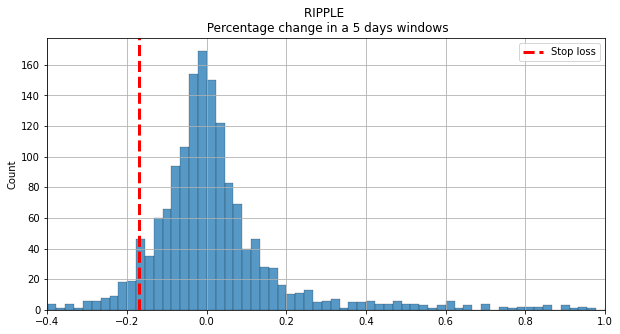

In [33]:

K = 5
data['pct_change'] = data['close'].pct_change(periods=K)
 


data = data[['date','close','pct_change']].dropna()
x_val= data['pct_change'].values
res = np.quantile( x_val, [0.05,0.5,0.95])
display(data['pct_change'].describe())
print(res)

fig,ax = plt.subplots(figsize=(10,5))


sns.histplot(x=x_val,log_scale=False,ax=ax)
plt.xlim(-0.40,1)
ax.axvline(-0.17,lw=3,ls='--',color='red',label='Stop loss')
plt.legend()
plt.grid(True)
plt.title(f'{NAME} \n Percentage change in a {K} days windows')
plt.show()

## Summary

- for 5 days windows define a stop loss base q=0.05 , 5% of the percentage change are below -17%.
- Mening we are willing to loss 17% of our initial investment.